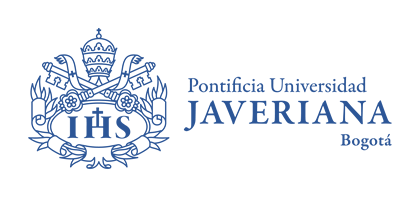

# Aprendizaje de Máquina - Redes neuronales artificiales
## Perceptrón y ADALINE
Este notebook tiene como objetivo familiarizar al estudiante con los modelos de redes neuronales básicos: Perceptrón y ADALINE. Se prueba el desempeño con 2 conjuntos de  datos: linealmente separables y no linealmente separables.


### Grupo 4
- Daniel Crovo
- Santiago Salazar

## Setup
Se instalan y se importan las librerías necesarias para el ejercicio

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn.datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split



In [2]:
sklearn.__version__

'1.2.2'

## Conjunto de datos - Generación de datos sintéticos

Inicialmente crearemos 2 conjuntos de datos sintéticos, uno linealmente separable y el otro no




In [3]:
N=300

In [4]:
# Creación del dataset aleatorio
X_ejemplo1 , y_true = make_blobs(n_samples=N, centers=2,
                       cluster_std=0.4, random_state=0)

In [5]:
# Intercambio X[0] y X[1]
X_ejemplo1 = X_ejemplo1[:, ::-1]

In [6]:
shuffler = np.random.permutation(len(y_true))
X_ejemplo1 = X_ejemplo1[shuffler]
y_true = y_true[shuffler]

In [7]:
X_ejemplo1

array([[ 4.64153252,  0.48609587],
       [ 4.43127839,  1.34461361],
       [ 4.79276536,  0.8149993 ],
       [-0.32079356,  1.89831192],
       [ 3.72204106,  1.88417193],
       [ 3.87181472,  1.42692445],
       [ 4.78473927,  1.46838635],
       [ 4.78824544,  0.55816873],
       [ 4.57642513,  0.56257294],
       [ 0.80859362,  2.28218363],
       [ 5.06781331,  0.6317798 ],
       [ 0.68188181,  1.24870487],
       [ 3.61327429,  0.65101157],
       [ 0.64490216,  2.52781896],
       [ 3.83654993,  0.96055695],
       [ 3.809857  ,  1.43203035],
       [ 0.57460426,  1.98124605],
       [ 4.58168698,  1.25288558],
       [ 0.9603452 ,  1.9093901 ],
       [ 4.56523477, -0.04492585],
       [ 0.45033889,  1.73301692],
       [ 4.14740598,  0.71530665],
       [ 1.00930197,  2.24051965],
       [ 4.33880782,  1.3560384 ],
       [ 0.59306678,  1.93853258],
       [ 0.93524495,  2.00322474],
       [ 4.62476989,  0.86906873],
       [ 4.54732486,  1.09080755],
       [ 4.32456549,

In [8]:
y_true

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

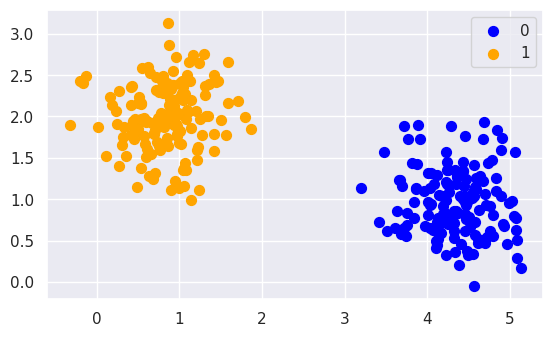

In [9]:
# Visualizamos los puntos

ax =  plt.gca()
ax.set_aspect('equal', adjustable='box')
for g, col in zip(np.unique(y_true),['blue','orange']):
    ix = np.where(y_true == g)
    ax.scatter(X_ejemplo1[ix,0], X_ejemplo1[ix,1], c = col, label = g, s = 50 )
#ax.scatter(X[:, 0], X[:, 1], s=50,  c=y_true, label=y_true,  cmap='viridis');
ax.legend()


## Generamos segundo dataset

In [10]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))),
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X_ejemplo2, y_true2 = twospirals(N)

In [11]:
shuffler = np.random.permutation(len(y_true2))
X_ejemplo2 = X_ejemplo2[shuffler]
y_true2 = y_true2[shuffler]

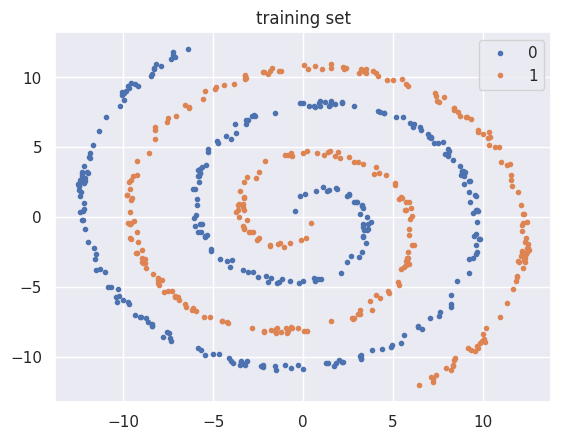

In [12]:
plt.title('training set')
plt.plot(X_ejemplo2[y_true2==0,0], X_ejemplo2[y_true2==0,1], '.', label=0)
plt.plot(X_ejemplo2[y_true2==1,0], X_ejemplo2[y_true2==1,1], '.', label=1)
plt.legend()
plt.show()

# Tareas:
* Dividir datasets train - test
* Crear perceptrón simple y probar su desempeño
* Crear ADALINE y probar su desempeño
* Probar ambos modelos con una regresión logística y probar su desempeño

In [13]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_ejemplo1, y_true, test_size=0.20, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_ejemplo2, y_true2, test_size=0.20, random_state=42)

In [14]:
X1_train.shape

(240, 2)

In [15]:
X1_test.shape

(60, 2)

##  1. Crear  perceptrón simple y probar su desempeño

El primer modelo a probar es un perceptron simple, complete las instrucciones que dicen TODO:

In [80]:
class Perceptron(object):

    def __init__(self, samples, labels, init_val = None):
        """
        Inicialización del perceptrón
        Parametros:
        samples -- Conjunto de entrenamiento
        labels -- Etiquetas
        init_val -- Pesos hipótesis inicial

        """
        ulabels = np.unique(labels)

        # se añade un 1 a los ejemplos (folding in)
        self.samples = np.insert(samples,0,np.ones(samples.shape[0]),axis=1)
        self.labels = labels
        # Inicialización aleatoria (en clase lo hicimos con 0's)
        if init_val is None:
            self.weights = np.random.rand(samples.shape[1] + 1)
        else:
            self.weights = np.full(samples.shape[1] + 1, float(init_val))
        pass

    def train(self, learning_rate = 0.01, iterations = 20, verbose=False):
        """
        Inicialización del perceptrón
        Parametros:
        learning_rate -- Paso del ajuste de hipótesis del perceptrón
        iterations -- Epocas

        """
        for i in range(iterations):
            errs = 0
            for sample, label, sample_id in zip(self.samples, self.labels, range(0,len(self.labels))):
                f = np.sign(np.dot(sample, self.weights))>0
                if f != label:
                  self.weights += learning_rate*((label-f)*sample)
                  errs += 1
                  if verbose:
                    print(f'Error in iteration {i+1} sample id {sample_id}')
                  pass
            if errs == 0:
                print("Found a boundary in %d iterations." % (i + 1))
                return self
            pass
        print("Failed to find a boundary.")
        pass

    def predict(self, new_samples):
        """
        Función de predicción del perceptrón
        Parametros:
        new_samples -- X

        Returns:
          Labels para los new_samples
        """
        #Inserta 1 a los samples
        X = np.insert(new_samples,0,np.ones(new_samples.shape[0]),axis=1)
        predicts= np.sign(np.dot(X,self.weights))>0
        return predicts.astype(int)

In [17]:
p= Perceptron(X1_train,Y1_train)


In [18]:
p.train()

Error in iteration 1 sample id 0
Error in iteration 1 sample id 2
Error in iteration 1 sample id 5
Error in iteration 1 sample id 8
Error in iteration 1 sample id 9
Error in iteration 1 sample id 12
Error in iteration 1 sample id 16
Error in iteration 1 sample id 18
Error in iteration 1 sample id 19
Error in iteration 1 sample id 21
Error in iteration 1 sample id 22
Error in iteration 1 sample id 23
Error in iteration 1 sample id 24
Error in iteration 1 sample id 26
Error in iteration 1 sample id 28
Error in iteration 1 sample id 92
Error in iteration 1 sample id 140
Error in iteration 2 sample id 140
Found a boundary in 3 iterations.


In [19]:
Y_hat = p.predict(X1_test)
Y_hat

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [20]:
Y1_test

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

### Compare utilizando las métricas precision y recall
https://scikit-learn.org/stable/modules/model_evaluation.html

In [23]:
from sklearn.metrics import precision_score, recall_score

precisionP1 = precision_score(Y1_test, Y_hat)

recallP1 = recall_score(Y1_test, Y_hat)
print("Precision: {}\nRecall: {}".format(precisionP1, recallP1))

Precision: 1.0
Recall: 1.0


In [81]:
p2= Perceptron(X2_train,Y2_train)

In [82]:
p2.train(iterations=1000)

Failed to find a boundary.


In [83]:
Y_hat2 = p.predict(X2_test)
Y_hat2

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [84]:
Y2_test

array([1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0.])

### Compare utilizando las métricas precision y recall
https://scikit-learn.org/stable/modules/model_evaluation.html

In [85]:
precisionP2 = precision_score(Y2_test, Y_hat2)

recallP2 = recall_score(Y2_test, Y_hat2)
print("Precision: {}\nRecall: {}".format(precisionP2, recallP2))

Precision: 0.5576923076923077
Recall: 0.4393939393939394


# 2. Crear modelo ADALINE

El segundo modelo a crear es el modelo ADALINE, complete el siguiente esquema completando las instrucciones TODO:

In [86]:
class ADALINE(object):

    def __init__(self, samples, labels, init_val = None):
        """
        Inicialización de modelo ADALINE
        Parametros:
        samples -- Conjunto de entrenamiento
        labels -- Etiquetas
        init_val -- Pesos hipótesis inicial

        """
        ulabels = np.unique(labels)

        # se añade un 1 a los ejemplos (folding in)
        self.samples = np.insert(samples,0,np.ones(samples.shape[0]),axis=1)
        self.labels = labels
        if init_val is None:
            self.weights = np.random.rand(samples.shape[1] + 1)
        else:
            self.weights = np.full(samples.shape[1] + 1, float(init_val))
        pass

    def train(self, learning_rate = 0.01, iterations = 20, verbose=False):
        """
        Inicialización del perceptrón
        Parametros:
        learning_rate -- Paso del ajuste de hipótesis del perceptrón
        iterations -- Epocas

        """
        for i in range(iterations):
            errs = 0
            for sample, label, sample_id in zip(self.samples, self.labels, range(0,len(self.labels))):
                #TODO:
                f = np.dot(sample, self.weights)
                error = label-f
                self.weights += learning_rate*error*sample
                if error != 0:
                  errs += 1
                  if verbose:
                    print(f'Error in iteration {i+1} sample id {sample_id}')
                  pass
            if errs == 0:
                print("Found a boundary in %d iterations." % (i + 1))
                return self
            pass
        print("Failed to find a boundary.")
        pass

    def predict(self, new_samples):
        """
        Función de predicción del perceptrón
        Parametros:
        new_samples -- X

        Returns:
          Labels para los new_samples
        """
        #Inserta 1 a los samples
        X = np.insert(new_samples,0,np.ones(new_samples.shape[0]),axis=1)
        # Recuerde usar los thresholds para las clases
        predicts= np.where(np.dot(X, self.weights)>=0, 1, 0)

        return predicts

In [87]:
a1= ADALINE(X1_train,Y1_train)


In [88]:
a1.train(iterations=1000)

Failed to find a boundary.


In [89]:
Y1a_hat =a1.predict(X1_test)

In [90]:
Y1_test

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

Compare utilizando las métricas precision y recall
https://scikit-learn.org/stable/modules/model_evaluation.html

In [91]:
precisionA1 = precision_score(Y1_test, Y1a_hat)

recallA1 = recall_score(Y1_test, Y1a_hat)
print("Precision: {}\nRecall: {}".format(precisionA1, recallA1))

Precision: 0.6808510638297872
Recall: 1.0


In [92]:
a2= ADALINE(X2_train,Y2_train)

In [93]:
a2.train(iterations=1000)

Failed to find a boundary.


In [94]:
Y2a_hat = a2.predict(X2_test)
Y2a_hat

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [95]:
Y2_test

array([1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0.])

In [96]:
precisionA2 = precision_score(Y2_test, Y2a_hat)

recallA2 = recall_score(Y2_test, Y2a_hat)
print("Precision: {}\nRecall: {}".format(precisionA2, recallA2))

Precision: 0.5227272727272727
Recall: 0.696969696969697


##  3. Crear modelo de regresión logística y probar desempeño

Inicialice un modelo de regresión logística usando scikit-learn y compare contra el modelo de perceptrón y ADALINE con ambos datasets.

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
LRModel1 = LogisticRegression()
LRModel2 = LogisticRegression()
LRModel1.fit(X1_train, Y1_train)
LRModel2.fit(X2_train, Y2_train)

Y_hatLR1 = LRModel1.predict(X1_test)
Y_hatLR2 = LRModel2.predict(X2_test)

## Comparación de los modelos para el primer dataset

In [99]:
precisionLR1 = precision_score(Y1_test, Y_hatLR1)
recallLR1 = recall_score(Y1_test, Y_hatLR1)
precisionLR2 = precision_score(Y2_test, Y_hatLR2)
recallLR2 = recall_score(Y2_test, Y_hatLR2)

print("Resultados:\n---------------------------------------------")
print("Precision dataset 1:\n\nPerceptron: {}\nAdaline: {}\nLogistic Regression: {}\n_____________________________________________".format(precisionP1, precisionA1, precisionLR1))
print("Recall dataset 1:\n\nPerceptron: {}\nAdaline: {}\nLogistic Regression: {}\n_____________________________________________".format(recallP1, recallA1, recallLR1))
print("Precision dataset 2:\n\nPerceptron: {}\nAdaline: {}\nLogistic Regression: {}\n_____________________________________________".format(precisionP2, precisionA2, precisionLR2))
print("Recall dataset 2:\n\nPerceptron: {}\nAdaline: {}\nLogistic Regression: {}\n_____________________________________________".format(recallP2, recallA2, recallLR2))

Resultados:
---------------------------------------------
Precision dataset 1:

Perceptron: 1.0
Adaline: 0.6808510638297872
Logistic Regression: 1.0
_____________________________________________
Recall dataset 1:

Perceptron: 1.0
Adaline: 1.0
Logistic Regression: 1.0
_____________________________________________
Precision dataset 2:

Perceptron: 0.5576923076923077
Adaline: 0.5227272727272727
Logistic Regression: 0.5901639344262295
_____________________________________________
Recall dataset 2:

Perceptron: 0.4393939393939394
Adaline: 0.696969696969697
Logistic Regression: 0.5454545454545454
_____________________________________________
